In [1]:
import cv2 
import numpy as np
import matplotlib.pyplot as plt
import glob
from PIL import Image
import tensorflow as tf
import pandas as pd
import os
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# 이미지 데이터 불러오고 전처리부터 시작


In [2]:
path='/Users/suminbae/Python-Workspace/kaggle/leedsbutterfly/images/*.png'

image_data=[]

for img in glob.glob(path):
    image=cv2.imread(img)
    #size reshaping
    image_arr=Image.fromarray(image,'RGB')
    size=image_arr.resize((50,50))
    image_data.append(np.array(size))
    

In [3]:
image_data=np.array(image_data)

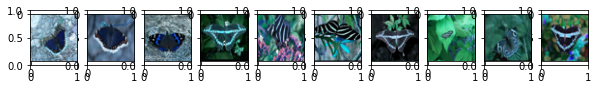

In [4]:
test_images=[]
fig,axes=plt.subplots(1,10,figsize=(10,1))

for i in range(1,11):
    axes=fig.add_subplot(1,10,i)
    test_images.append(Image.fromarray(image_data[i],'RGB'))
    axes.set_xticks([0])
    axes.set_yticks([0])
    axes.imshow(test_images[i-1])
    
    


# label 정리하기


In [5]:
path='/Users/suminbae/Python-Workspace/kaggle/leedsbutterfly/images/'
labels=[]
for filename in os.listdir(path):
    type_num=filename.split(".")
    num=type_num[0][:3]
    labels.append(num)
    
    

In [6]:
len(labels)

832

In [7]:
cat=pd.DataFrame(labels)

In [8]:
cat

,0
0,006
1,006
2,006
3,010
4,007
...,...
827,009
828,010
829,010
830,010


In [9]:
cat[0]=cat[0].replace({'001': 'Danaus_plexippus', '002': 'Heliconius_charitonius', '003': 'Heliconius_erato', '004': 'Junonia_coenia', '005': 'Lycaena_phlaeas', '006': 'Nymphalis_antiopa', '007': 'Papilio_cresphontes', '008': 'Pieris_rapae', '009': 'Vanessa_atalanta', '010': 'Vanessa_cardui'}) 
cat.head()

,0
0,Nymphalis_antiopa
1,Nymphalis_antiopa
2,Nymphalis_antiopa
3,Vanessa_cardui
4,Papilio_cresphontes


# one_hot으로 표현

In [10]:
label_encoder=LabelEncoder()
label=label_encoder.fit_transform(cat[0])
train_label=tf.keras.utils.to_categorical(label,10)

In [11]:
train_label.shape

(832, 10)

In [12]:
x_train,x_test,y_train,y_test=train_test_split(image_data,train_label,test_size=0.3,shuffle=True)

In [13]:
x_train.shape,y_train.shape

((582, 50, 50, 3), (582, 10))

In [14]:
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from keras.layers import Activation, Convolution2D, Dropout, Conv2D
from keras.layers import AveragePooling2D, BatchNormalization
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Flatten
from keras.models import Model
from keras.layers import Input
from keras.layers import MaxPooling2D
from keras.layers import SeparableConv2D
from keras import layers
from keras.regularizers import l2
import pandas as pd
import cv2
import numpy as np
l2_reg=0.001

Using TensorFlow backend.


In [15]:
model = tf.keras.models.Sequential([])

model.add(tf.keras.layers.Conv2D(filters=32, kernel_size=(2,2), input_shape=(50,50, 3), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Conv2D(filters=128, kernel_size=(2,2), activation='relu',kernel_regularizer=l2(l2_reg)))
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(tf.keras.layers.Dropout(0.1))

model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dropout(0.1))
model.add(tf.keras.layers.Dense(10, activation='softmax'))


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [16]:
mod=model.fit(x_train,y_train,epochs=50,batch_size=128)

Train on 582 samples
Epoch 1/50
582/582 [==============================] - 2s 4ms/sample - loss: 179.8021 - acc: 0.1065
Epoch 2/50
582/582 [==============================] - 2s 3ms/sample - loss: 77.0821 - acc: 0.1186
Epoch 3/50
582/582 [==============================] - 2s 3ms/sample - loss: 10.3346 - acc: 0.1357
Epoch 4/50
582/582 [==============================] - 1s 2ms/sample - loss: 2.7632 - acc: 0.1890
Epoch 5/50
582/582 [==============================] - 1s 3ms/sample - loss: 2.2591 - acc: 0.2354
Epoch 6/50
582/582 [==============================] - 1s 2ms/sample - loss: 2.1981 - acc: 0.2766
Epoch 7/50
582/582 [==============================] - 1s 2ms/sample - loss: 2.0337 - acc: 0.3213
Epoch 8/50
582/582 [==============================] - 1s 2ms/sample - loss: 1.8539 - acc: 0.3832
Epoch 9/50
582/582 [==============================] - 1s 2ms/sample - loss: 1.7802 - acc: 0.4227
Epoch 10/50
582/582 [==============================] - 1s 2ms/sample - loss: 1.6488 - acc: 0.4828
Epoc

No handles with labels found to put in legend.


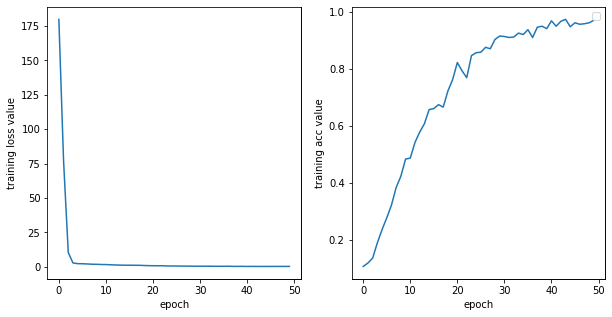

In [34]:
fig,axes=plt.subplots(1,2,figsize=(10,5))

for ax in axes:
    ax.set_xticks([])
    ax.set_yticks([])
    

axes=fig.add_subplot(1,2,1)
axes.plot(mod.history['loss'])
axes.set_xlabel("epoch")
axes.set_ylabel("training loss value")

axes=fig.add_subplot(1,2,2)
axes.plot(mod.history['acc'])
axes.set_xlabel("epoch")
axes.set_ylabel("training acc value")



# 평가 결과 loss 1.55  acc:70% 확률 overfitting이 일어남

In [36]:
model.evaluate(x_test,y_test)

250/250 [==============================] - 0s 1ms/sample - loss: 1.5563 - acc: 0.6960


[1.5562776079177856, 0.696]

#### https://www.kaggle.com/subbhashit/butterfly-classification 참조